# GDP vs Life Expentacy over time Project
## Introduction
In this project I am going to explore the relationship of Gross Domestic Product (GDP) and Life Expectancy (years) for a few different countries around the world. Enfasis would on using data visualization and infrence to obtain data conclusions.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in all the nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [2]:
# Import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("all_data.csv")

print(df.head())

df.shape


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


(96, 4)

Let's further check data. First let's see unique countries and years.

In [3]:
print(df.Country.unique())
print(df.Year.unique())


['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We have six countries represented in the data and years from 2000 up to 2015.

Next, we can see that the Life Expectancy column is very long. Let's rename it so it is manageble. 

In [4]:
df = df.rename({"Life expectancy at birth (years)":"LEAB"}, axis = "columns")
print(df.head())

  Country  Year  LEAB           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


## Plots
Now let's explore the data using plots to visualize better the relationships

Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

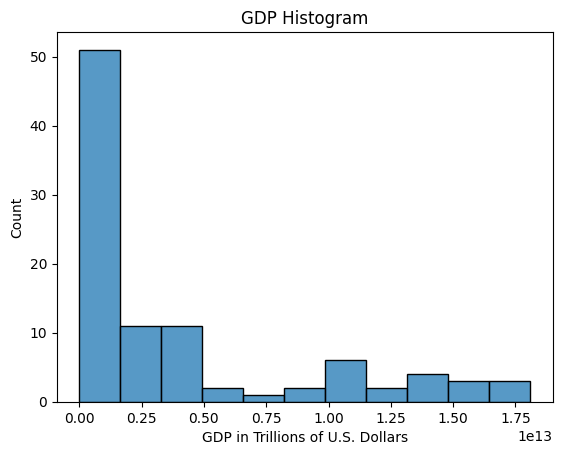

In [5]:
sns.histplot(df.GDP, kde=False)
plt.title("GDP Histogram")
plt.xlabel("GDP in Trillions of U.S. Dollars")

Text(0.5, 0, 'Life expectancy at birth (years)')

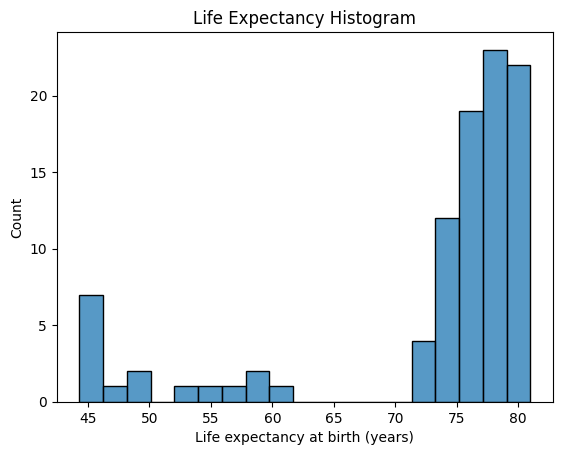

In [6]:
sns.histplot(df.LEAB, kde=False)
plt.title("Life Expectancy Histogram")
plt.xlabel("Life expectancy at birth (years)")

Now, let's create a new dataframe with the Means of LEAB per country to better visualize the data per country. First, group by country, then calculate the mean.

In [7]:
dfMeans = df.drop("Year", axis=1).groupby("Country").mean().reset_index()
dfMeans

,Country,LEAB,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now we can use a bar plot to visualize these means by country. On the y-axis we have countries, beacuse the labels are easier to position and read, and on the x-axis mean years. The plot has a descending order to better compare each country.

Text(0.5, 0, 'Life expectancy at birth (years)')

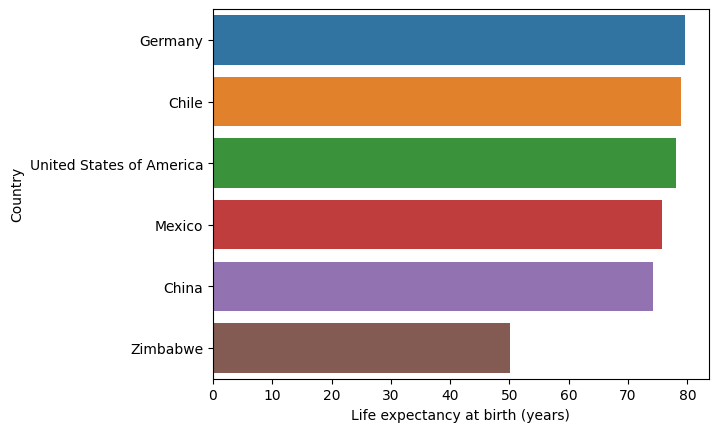

In [13]:
plot_order = dfMeans.groupby('Country')['LEAB'].sum(
).sort_values(ascending=False).index.values
sns.barplot(x="LEAB", y="Country", data=dfMeans, order=plot_order)
plt.xlabel("Mean life expectancy at birth")



Next, we can visualize the Mean data using GDP. From here we can grasp a bit if there is or not a relationship between GDP and Life Expectancy.

Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

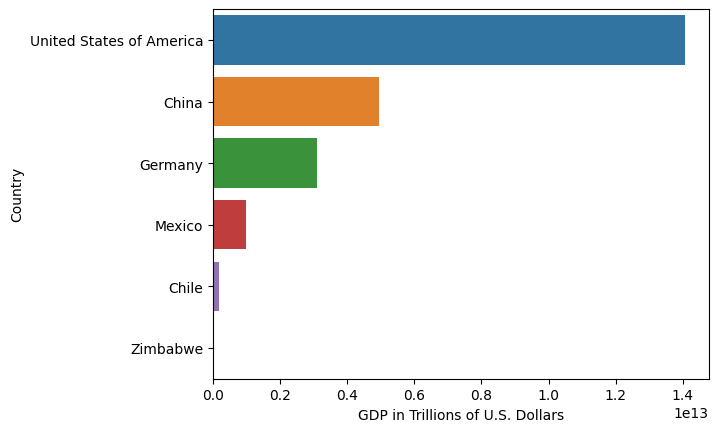

In [15]:
plot_order = dfMeans.groupby('Country')['GDP'].sum(
).sort_values(ascending=False).index.values
sns.barplot(x="GDP", y="Country", data=dfMeans, order=plot_order)
plt.xlabel("GDP in Trillions of U.S. Dollars")


Here we can conclude that there is a relationship between GDP and Life Expectancy, but also we can see that the relationship flattens, meaning that even though the USA has the biggest GDP in the world, not necessarily has the best life expectancy. Further visualization is required, and probably an independent study in the top GDP countries for further causes and evidence. 

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

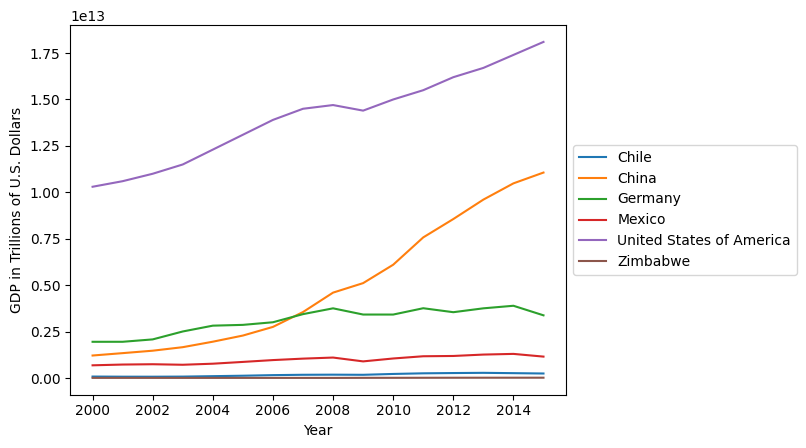

In [21]:
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")


In this line plot we can see the GDP growth of all the countries. Again, we can see China and USA being the biggest, but not necessarily the best Life Expectancy. The rest of the countries follow the relationship. 

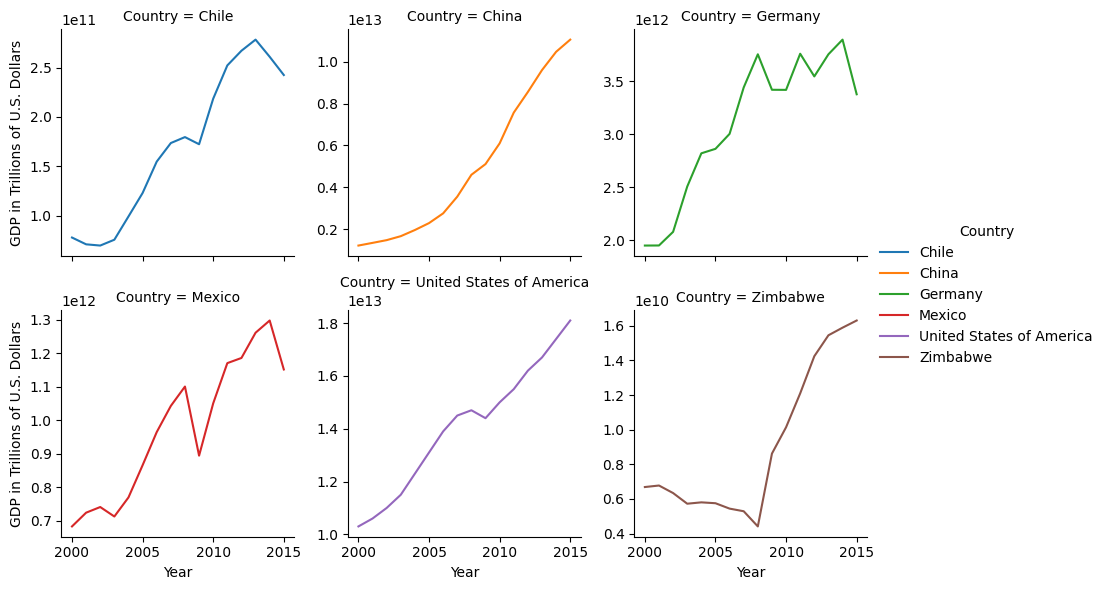

In [11]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                         hue="Country", sharey=False)

graphGDP = (graphGDP.map(sns.lineplot, "Year", "GDP")
            .add_legend()
            .set_axis_labels("Year", "GDP in Trillions of U.S. Dollars"))

graphGDP


Text(0, 0.5, 'Life expectancy at birth (years)')

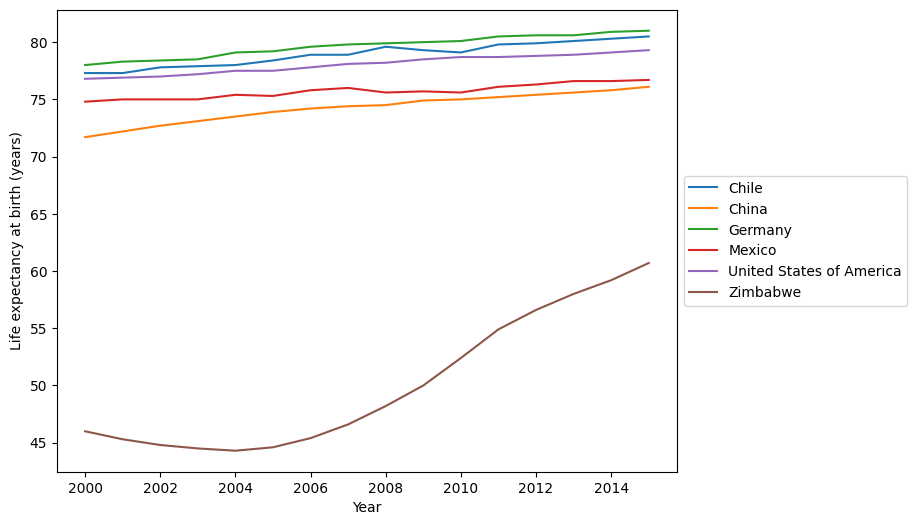

In [12]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.Year, y=df.LEAB, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")


Next, let's explore more we Scatter Plots

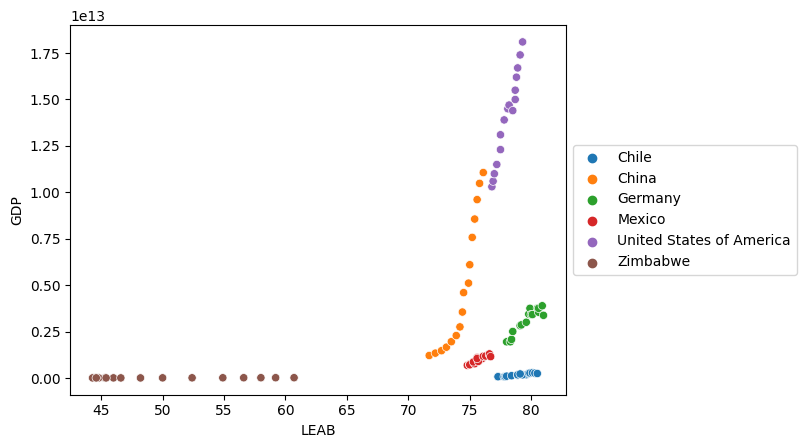

In [22]:
sns.scatterplot(x=df.LEAB, y=df.GDP, hue=df.Country).legend(
    loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In the scatter plot we can observe the slopes of the relationship. In this plot we can see a strong relationship we GDP and Life Expetancy, although we different slopes for each country. China and USA have similar slopes, Germany and Mexico too, Chile has a more flat slope, and Zimbabwe is basically flat.

## Conclusions

We can now answer the questions in the Scope of this project.

+ Life expectancy have increased over the years, even we Zimbabwe being behind the curve. It's known that Zimbabwe has had difficult times and it's not a surprise. China has increased it's life expectancy over the years in a faster way.
+ GDP has increased over time too. Some countries much faster than others. I would suggest to use GPD per capita as a better gauge of growth for every country.
+ There is a positive correlation between GDP and Life Expectancy.
+ The average life expectancy of these nations is between mid 70's and almost 80's, with the exception of Zimbabwe which is around 50 years old.
+ The life expectancy has a left swew distribution for most of the data. Again, Zimbabwe bringing in the outliers to the left.
